In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../data/adult.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'target']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [7]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df = pd.DataFrame(ord_enc.fit_transform(df), columns=df.columns)

In [8]:
X = df.drop(['target'], axis=1)
y = df.target

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [10]:
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

In [11]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2, random_state=42)

In [12]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [13]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

train_acc_tree = accuracy_score(y_train, y_train_pred)
test_acc_tree = accuracy_score(y_test, y_test_pred)

print(f'Train accuracy: {train_acc_tree}')
print(f'Test accuracy: {test_acc_tree}')

Train accuracy: 0.8259038259038259
Test accuracy: 0.8270037874910431


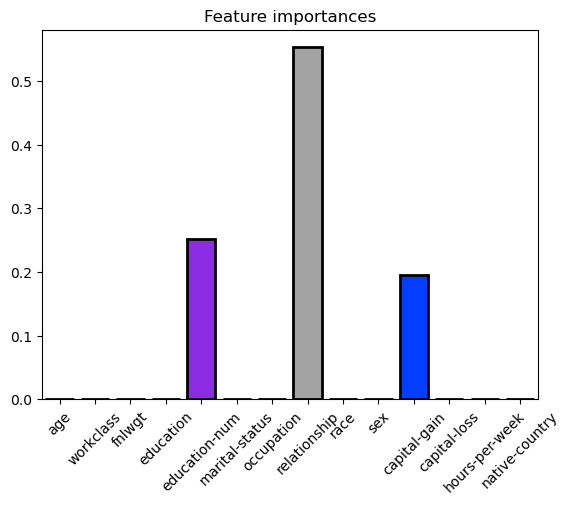

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances, palette = 'bright', saturation = 2.0, edgecolor ='black', linewidth = 2)
plt.title("Feature importances")
plt.xticks(rotation=45)
plt.show()

## Train model using Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [17]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print(f'Random forest accuracy train: {train_acc_rf}')
print(f'Random forest accuracy test: {test_acc_rf}')

Random forest accuracy train: 0.9873201123201123
Random forest accuracy test: 0.8494216398812571


In [19]:
features_scores = pd.Series(rf.feature_importances_, index = X_train.columns ).sort_values(ascending=False)
features_scores

age               0.165899
fnlwgt            0.164309
capital-gain      0.116991
relationship      0.096935
hours-per-week    0.084539
education-num     0.084326
occupation        0.069447
marital-status    0.060276
workclass         0.040153
education         0.037810
capital-loss      0.035265
native-country    0.017800
race              0.014113
sex               0.012137
dtype: float64

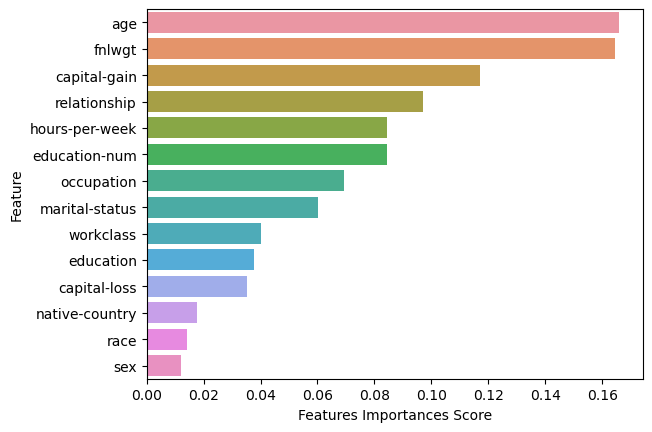

In [20]:
sns.barplot(x=features_scores, y=features_scores.index)
plt.xlabel('Features Importances Score')
plt.ylabel('Feature')
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred_rf)
cm

array([[6954,  501],
       [ 970, 1344]])

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      7455
         1.0       0.73      0.58      0.65      2314

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



## Removing low importances feature and train again the model

In [23]:
X = df.drop(['target', 'sex', 'race', 'native-country'], axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [24]:
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print(f'Random forest accuracy train: {train_acc_rf}')
print(f'Random forest accuracy test: {test_acc_rf}')

Random forest accuracy train: 0.987934362934363
Random forest accuracy test: 0.8514689323369843


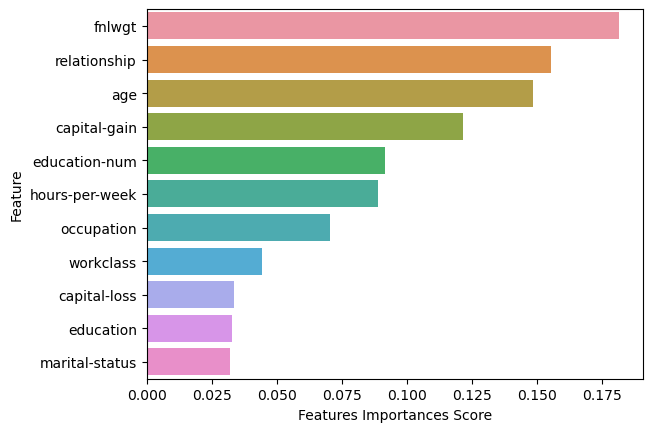

In [25]:
features_scores = pd.Series(rf.feature_importances_, index = X_train.columns ).sort_values(ascending=False)
sns.barplot(x=features_scores, y=features_scores.index)
plt.xlabel('Features Importances Score')
plt.ylabel('Feature')
plt.show()

In [26]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      7455
         1.0       0.73      0.59      0.65      2314

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.84      0.85      0.85      9769

